In [26]:
#importing required packages 

import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import matplotlib.style as style 
import pandas as pd 

In [27]:
df = pd.read_csv('/content/coffee_table data analysis.csv')

In [28]:
#data about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [29]:

df.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


In [30]:
#checking missing values in column 

df.isna().sum()

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price               0
Delivery option     0
Dine in option     60
Takeout option     56
dtype: int64

In [31]:
cat = ['Region', 'Place type' , 'Rating', 'Reviews', 'Price', 'Delivery option', 'Dine in option', 'Takeout option']

for column in cat:
  print(df[column].value_counts())


C    20
J    20
F    20
B    20
A    20
E    20
D    20
G    20
I    20
H    20
Name: Region, dtype: int64
Coffee shop     97
Cafe            58
Others          25
Espresso bar    20
Name: Place type, dtype: int64
4.6    47
4.7    39
4.9    25
4.5    22
5.0    21
4.8    18
4.4    12
4.3     6
4.2     2
4.1     2
4.0     2
3.9     2
Name: Rating, dtype: int64
10.0     5
15.0     4
18.0     4
14.0     3
26.0     3
        ..
440.0    1
488.0    1
807.0    1
837.0    1
599.0    1
Name: Reviews, Length: 163, dtype: int64
$$     194
$$$      4
$        2
Name: Price, dtype: int64
False    165
True      35
Name: Delivery option, dtype: int64
True    140
Name: Dine in option, dtype: int64
True    144
Name: Takeout option, dtype: int64


In [32]:
#Since rating and reviews have missing values, will replace reviews with median value and rating with zero for no values in column

df['Rating'] = df['Rating'].fillna(0)
#median = np.median(df['Reviews'].dropna())

#df['Reviews'] = df['Reviews'].fillna('median')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [33]:
#df['Reviews'] = df['Reviews'].astype(int)
median = np.mean(df['Reviews'].dropna())
df['Reviews'] = df['Reviews'].fillna(median)
df.info()
#df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [34]:
#Clean dine in and takeout column 

df['Dine in option'] = df['Dine in option'].fillna(False)
df['Takeout option'] = df['Takeout option'].fillna(False)
df['Dine in option'] = df['Dine in option'].astype('bool')
df['Takeout option'] = df['Takeout option'].astype('bool')

print(df)

    Region                   Place name   Place type  Rating  Reviews Price  \
0        C                     Dim Kavu       Others     4.6    206.0    $$   
1        C                      Коферум         Cafe     5.0     24.0    $$   
2        C             Кофейня Світ Чаю  Coffee shop     5.0     11.0    $$   
3        C             Кофейня Starcoff  Coffee shop     4.4    331.0    $$   
4        C        Кофейня "Friend Zone"  Coffee shop     5.0     12.0    $$   
..     ...                          ...          ...     ...      ...   ...   
195      H                       Artist       Others     4.6    963.0   $$$   
196      H                   Dream Cafe         Cafe     4.3    646.0    $$   
197      H  РУТА КАФЕ ПП КУЛІЧЕНКО К.І.         Cafe     4.6     16.0    $$   
198      H               Ob'yektna Kava  Coffee shop     4.7    599.0    $$   
199      H   О...МАРАТ КАФЕ ПП ПОЛІСТЕП         Cafe     4.3    341.0    $$   

     Delivery option  Dine in option  Takeout optio

[Text(0.5, 1.0, 'Graph 1 the Count of Rating')]

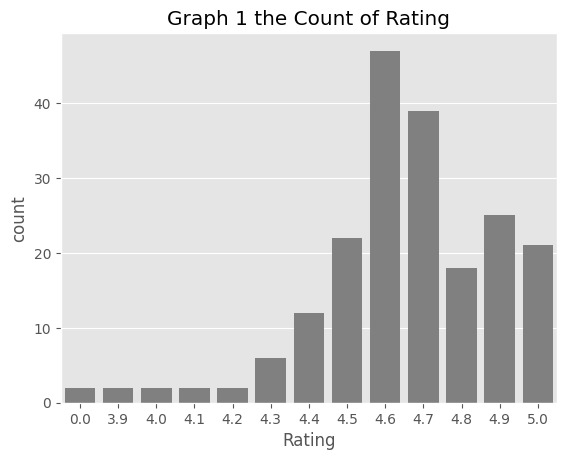

In [35]:
#Exploratory analysis inspecting rating and reviews variables.

style.use('ggplot')
sns.countplot(x=df['Rating'], color= 'gray').set(title='Graph 1 the Count of Rating')

[Text(0.5, 1.0, 'Graph 2-1 The Distribution of Number of Reviews ')]

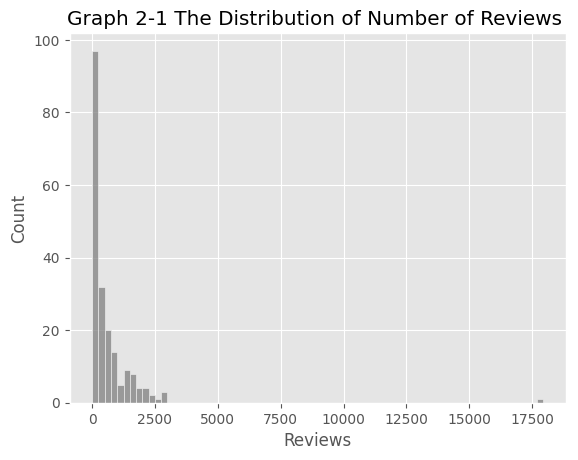

In [36]:
#Review variable are our target variable, since we dont have lots of data, we will use log transformation. We can see 
#distribution is much closer to a normal distribution

sns.histplot(x=df['Reviews'],  color = 'gray').set(title= 'Graph 2-1 The Distribution of Number of Reviews ')

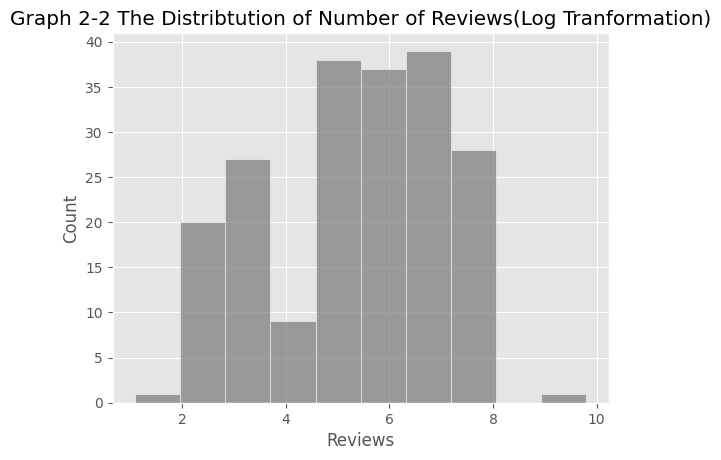

In [37]:
sns.histplot(x=np.log(df['Reviews']), color = 'gray').set(title='Graph 2-2 The Distribtution of Number of Reviews(Log Tranformation)');

[Text(0.5, 1.0, 'Graph 3-1 The Boxplot distribution of Reviews and Ratings')]

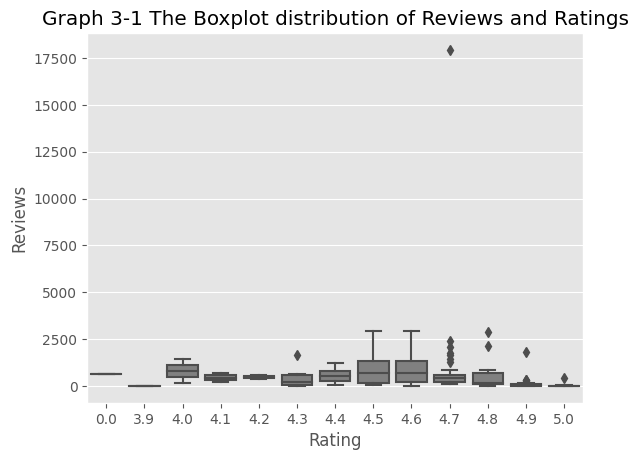

In [38]:
sns.boxplot(data=df, y='Reviews', x= 'Rating', color = 'gray').set(title='Graph 3-1 The Boxplot distribution of Reviews and Ratings')

[Text(0.5, 1.0, 'Graph 3-1 The Barplot distribution of Reviews and Ratings')]

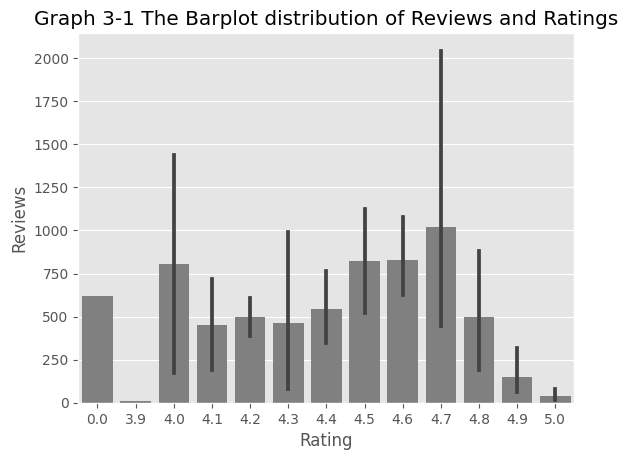

In [39]:
sns.barplot(data=df, y='Reviews', x= 'Rating', color = 'gray').set(title='Graph 3-1 The Barplot distribution of Reviews and Ratings')

In [40]:
#Finding outliers and removing them 

outlier = df['Reviews'] == df['Reviews'].max()
df_remove= df[~outlier]

[Text(0.5, 1.0, 'The Boxplot between ratings and reviews with outliers removed')]

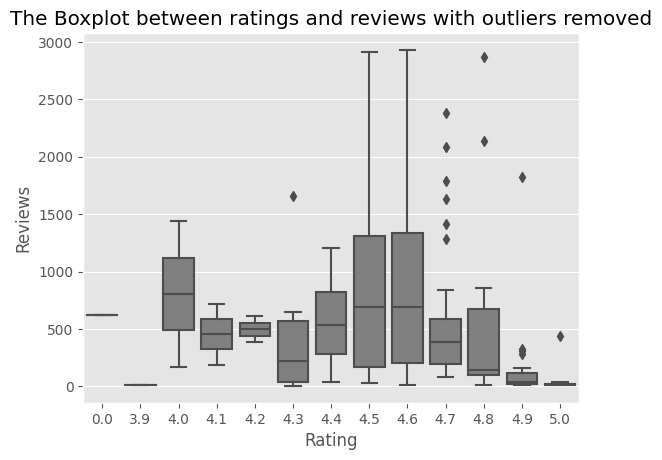

In [41]:
sns.boxplot(data = df_remove, y='Reviews', x= 'Rating', color= 'gray').set(title='The Boxplot between ratings and reviews with outliers removed')

[Text(0.5, 1.0, 'The barplot between ratings and reviews with outliers removed')]

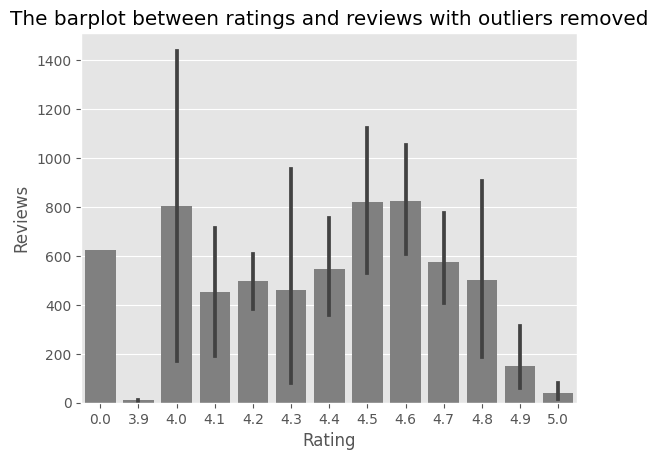

In [42]:
sns.barplot(data = df_remove, y='Reviews', x= 'Rating', color= 'gray').set(title='The barplot between ratings and reviews with outliers removed')

[Text(0.5, 1.0, 'The Boxplot between ratings and reviews with outliers removed')]

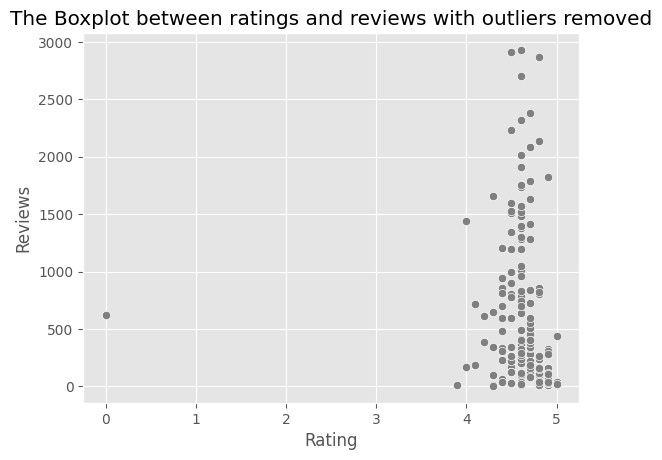

In [43]:
sns.scatterplot(data = df_remove, y='Reviews', x= 'Rating', color= 'gray').set(title='The Boxplot between ratings and reviews with outliers removed')

In [44]:
#Model changes to enable modeling 
# as place name is not there,no need pf removing any columns
#removed one outlier by using max function
df.info()
outlier = df['Reviews']==df['Reviews'].max()
df= df[~outlier]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   200 non-null    bool   
 8   Takeout option   200 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 10.1+ KB


In [56]:
#apply log transformation
from sklearn import preprocessing 
features = df.drop(columns='Reviews')
features = df.drop(columns='Place name')

X = pd.get_dummies(features, columns = ['Region', 'Place type' , 'Rating', 'Price', 'Delivery option', 'Dine in option', 'Takeout option'])
y = np.log(df['Reviews'])







print(y)
print(X)

0      5.327876
1      3.178054
2      2.397895
3      5.802118
4      2.484907
         ...   
195    6.870053
196    6.470800
197    2.772589
198    6.395262
199    5.831882
Name: Reviews, Length: 199, dtype: float64
     Reviews  Region_A  Region_B  Region_C  Region_D  Region_E  Region_F  \
0      206.0         0         0         1         0         0         0   
1       24.0         0         0         1         0         0         0   
2       11.0         0         0         1         0         0         0   
3      331.0         0         0         1         0         0         0   
4       12.0         0         0         1         0         0         0   
..       ...       ...       ...       ...       ...       ...       ...   
195    963.0         0         0         0         0         0         0   
196    646.0         0         0         0         0         0         0   
197     16.0         0         0         0         0         0         0   
198    599.0         

In [57]:
df.isnull().any().any()

False

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix


In [59]:
#splitting into training and testing in the form of 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)


In [60]:
print(X_train)

y_train = np.where(np.isinf(y_train), np.nan, y_train)
y_train = np.nan_to_num(y_train, nan=1e9)

     Reviews  Region_A  Region_B  Region_C  Region_D  Region_E  Region_F  \
189    155.0         0         0         0         0         0         0   
33      17.0         0         0         0         0         0         0   
23     329.0         0         0         0         0         0         0   
180   2381.0         0         0         0         0         0         0   
41     726.0         0         0         0         0         0         1   
..       ...       ...       ...       ...       ...       ...       ...   
17     136.0         0         0         1         0         0         0   
98      80.0         1         0         0         0         0         0   
66     118.0         0         1         0         0         0         0   
127    190.0         0         0         0         1         0         0   
110   2873.0         0         0         0         0         1         0   

     Region_G  Region_H  Region_I  ...  Rating_5.0  Price_$  Price_$$  \
189         0 

In [61]:
#Baselines Model - Linear Regression Model 
lr = LinearRegression()

lr.fit(X_train, y_train)


y_predict_lr = lr.predict(X_test)
print(y_predict_lr)

[7.88387949 6.36478824 6.37117101 4.58889368 7.48614208 4.59927451
 4.88629249 3.92428269 3.15786473 7.92335722 5.94056617 4.54044426
 6.97555438 4.96706207 4.91165189 8.22428126 4.57315807 3.21997435
 7.26514816 5.78982602 7.48533847 6.26495877 4.62569418 4.99178979
 7.65370271 5.02654453 5.79921801 3.7540802  5.83617411 4.68656922
 7.9205821  6.22382001 4.51064757 7.18894732 6.06768763 5.82659893
 7.08316469 6.25002121 3.48581385 9.18067379]


In [62]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
y_pred_rf_model = rf_model.predict(X_test)

In [64]:
#Evaluation using mean squared error for linear regression


mse_lr = mean_squared_error((y_test), (y_predict_lr))
print(mse_lr)

0.9274670543918255


In [65]:
mse_rf = mean_squared_error((y_test), (y_pred_rf_model))

print(mse_rf)

0.03679426175153211


In [72]:

rf_model.score(X_test,y_test)


0.989479335922692

In [74]:
lr.score(X_test, y_test)

0.7348073080547561

A smaller rmse value suffes smaller error in prediction, hence, random forrest has performed better than linear regression based on metric. 

Seeing the score, we can say RandomForestRegressor performed better than Linear Regression with higher score of 98%